In [1]:
#For Google Collab
from google.colab import drive, auth
from googleapiclient.discovery import build
#For data manipulation
import numpy as np 
import pandas as pd 
import random
#For Plotting
import matplotlib.pyplot as plt
#For Modeling
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, Input, concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers, regularizers
from keras.optimizers import Adam, SGD
from keras.applications.resnet50 import ResNet50
from keras.callbacks  import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
# Load the Drive helper and mount
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
auth.authenticate_user()

In [0]:
drive_service = build('drive', 'v3')

In [0]:
#Create variable for image and batch size along with number of epochs committing to for model
height = 224
width = 224
batch_size = 32

train = ImageDataGenerator(rescale = 1/.255,rotation_range=30,horizontal_flip=True)
test = ImageDataGenerator(rescale=1/.255,rotation_range=30,horizontal_flip=True)

In [7]:
#Seting up train, test, and val sets for model

train_set = train.flow_from_directory('../content/drive/My Drive/Chest_X_rays/All_Chest/train'
                                      ,target_size=(width,height), 
                                      batch_size=batch_size,
                                      shuffle = True,
                                      class_mode='categorical',
                                     seed = 122)
test_set = train.flow_from_directory('../content/drive/My Drive/Chest_X_rays/All_Chest/test'
                                      ,target_size=(width,height), 
                                      batch_size=batch_size,
                                     shuffle = True,
                                      class_mode='categorical',                               
                                    seed = 122)
val_set = train.flow_from_directory('../content/drive/My Drive/Chest_X_rays/All_Chest/val'
                                      ,target_size=(width,height), 
                                      batch_size=batch_size,
                                    shuffle = True,
                                      class_mode='categorical',                                  
                                    seed = 122)

Found 4747 images belonging to 3 classes.
Found 1885 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [8]:
def model():
    image_input = Input(shape=(224,224, 3))
    model=ResNet50(weights='imagenet',include_top=True, input_tensor=image_input)
    last_layer = model.get_layer('fc1000').output
    out = Dense(1028, activation='relu', name='fc10006')(last_layer)
    out = Dense(512, activation='relu', name='fc10005')(last_layer)
    out = Dense(256, activation='relu',name ='fc1004')(out)
    out = Dense(128, activation='relu',name ='fc1003')(out)
    out = Dense(64, activation='relu',name ='fc1002')(out)
    out = Dense(32, activation='relu',name ='fc1001')(out)
    out = Dense(3, activation='softmax',name ='fc1006')(out)
    custom_model = Model(input=image_input,output=out)

    
    return custom_model
  
model_Res = model()

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 3s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  if sys.path[0] == '':


In [0]:
model_Res.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
rt=ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=1, verbose=1, mode='auto', min_delta=0.01, cooldown=1, min_lr=.0000000000009)
es = EarlyStopping(monitor='val_acc', min_delta=0, patience=0, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
model_Res.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=Adam(lr=0.001),
                 metrics=['accuracy'])
history = model_Res.fit_generator(train_set, steps_per_epoch=100, epochs=10, validation_steps=500, verbose=1, validation_data=test_set,callbacks=[rt])
history

Epoch 1/10
100/100 [==============================] - 664s 7s/step - loss: 0.5558 - acc: 0.8010 - val_loss: 0.6991 - val_acc: 0.7263
Epoch 2/10
100/100 [==============================] - 638s 6s/step - loss: 0.3680 - acc: 0.8758 - val_loss: 1.3383 - val_acc: 0.4811

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/10
100/100 [==============================] - 636s 6s/step - loss: 0.2819 - acc: 0.8928 - val_loss: 1.5575 - val_acc: 0.6896

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/10
100/100 [==============================] - 636s 6s/step - loss: 0.2464 - acc: 0.9075 - val_loss: 0.6686 - val_acc: 0.7980
Epoch 5/10
100/100 [==============================] - 634s 6s/step - loss: 0.2387 - acc: 0.9094 - val_loss: 0.3578 - val_acc: 0.8731
Epoch 6/10
100/100 [==============================] - 640s 6s/step - loss: 0.2334 - acc: 0.9141 - val_loss: 0.3241 - val_acc: 0.8819

Epoch 00006: ReduceLROnPlateau reduci

In [19]:
rt=ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=1, verbose=1, mode='auto', min_delta=0.01, cooldown=1, min_lr=.0000000000009)
es = EarlyStopping(monitor='val_acc', min_delta=0, patience=0, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
model_Res.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=Adam(lr=0.001),
                 metrics=['accuracy'])
history = model_Res.fit_generator(train_set, steps_per_epoch=100, epochs=10, validation_steps=500, verbose=1, validation_data=test_set,callbacks=[rt])
history

Epoch 1/10
100/100 [==============================] - 678s 7s/step - loss: 0.4821 - acc: 0.8300 - val_loss: 1.8261 - val_acc: 0.2953
Epoch 2/10
100/100 [==============================] - 652s 7s/step - loss: 0.2724 - acc: 0.9059 - val_loss: 0.9910 - val_acc: 0.3742
Epoch 3/10
100/100 [==============================] - 648s 6s/step - loss: 0.2596 - acc: 0.9047 - val_loss: 1.9922 - val_acc: 0.2957

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/10
100/100 [==============================] - 653s 7s/step - loss: 0.2553 - acc: 0.9209 - val_loss: 1.1428 - val_acc: 0.7692
Epoch 5/10
100/100 [==============================] - 652s 7s/step - loss: 0.2045 - acc: 0.9360 - val_loss: 0.9057 - val_acc: 0.7635

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 6/10
100/100 [==============================] - 653s 7s/step - loss: 0.2318 - acc: 0.9245 - val_loss: 0.5376 - val_acc: 0.8370
Epoch 7/10
100/100 [==================

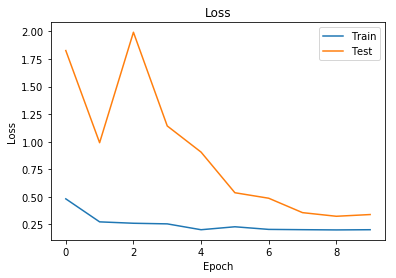

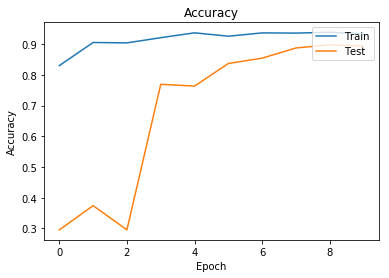

In [20]:
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

plt.plot(history.history['acc'], label = 'Train')
plt.plot(history.history['val_acc'], label = 'Test')
plt.legend(loc = 'upper right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()